# Anna's Messy Data World

In [2]:
#imports
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import regex as re

import prepare as p
from sklearn.model_selection import train_test_split

In [48]:
#bring in .csv
df = pd.read_csv('all_accident_data-Copy1.csv', index_col=None)

In [49]:
#drop unnecessary columns
df = df.drop(columns=['index', 'Unnamed: 0'])

In [50]:
df['speed_limit'] = df['speed_limit'].str.extract('(\d+)').astype(int)

In [51]:
df

,crash_url,case_id,crash_id,crash_city,crash_date,crash_latitude,crash_longitude,police_dept,accident_factor,speed_limit,...,driver_age,driver_gender,driver_ethnicity,driver_residence,driver_car_damage,driver_license_type,driver_license_state,driver_insured,traffic_conditions,weather_conditions
0,https://app.myaccident.org/accident/0000281836...,SAPD21133935,18365140,"SAN ANTONIO, TX",07/12/21 07:00 PM,29.416846,-98.409521,SAN ANTONIO POLICE DEPARTMENT,The driver of 2006 NEW FLYER TURNED WHEN UNSAFE,30,...,63.0,Male,Black,NaN,LBQ - LEFT BACK QUARTER DAMAGE ANGULAR IMPACT,"Commercial driver lic., class b",Texas,Yes,STOP SIGN,CLEAR
1,https://app.myaccident.org/accident/0000281836...,SAPD21133935,18365140,"SAN ANTONIO, TX",07/12/21 07:00 PM,29.416846,-98.409521,SAN ANTONIO POLICE DEPARTMENT,The driver of 2006 NEW FLYER TURNED WHEN UNSAFE,30,...,33.0,Female,Black,NaN,FL - FRONT END (LEFT) DAMAGE PARTIAL CONTACT,"Driver license, class c",Texas,Yes,STOP SIGN,CLEAR
2,https://app.myaccident.org/accident/0000281836...,SAPD21133954,18362861,"SAN ANTONIO, TX",07/12/21 06:55 PM,29.608839,-98.492803,SAN ANTONIO POLICE DEPARTMENT,NaN,45,...,NaN,Unknown,Unknown,NaN,UNKNOWN,"Unknown, unknown",NaN,Unknown,MARKED LANES,CLOUDY
3,https://app.myaccident.org/accident/0000281836...,SAPD21133954,18362861,"SAN ANTONIO, TX",07/12/21 06:55 PM,29.608839,-98.492803,SAN ANTONIO POLICE DEPARTMENT,NaN,45,...,54.0,Male,White,NaN,BD - BACK END DAMAGE DISTRIBUTED IMPACT,"Driver license, class c",Texas,Yes,MARKED LANES,CLOUDY
4,https://app.myaccident.org/accident/0000281837...,21-1037,18378488,"SHAVANO PARK, TX",07/12/21 06:45 PM,29.597752,-98.562687,SHAVANO PARK POLICE DEPARTMENT,The driver of 2011 JEEP DRIVER INATTENTION The...,45,...,29.0,Female,Hispanic,NaN,FD - FRONT END DAMAGE DISTRIBUTED IMPACT,"Id card, unlicensed",Texas,Unknown,SIGNAL LIGHT,CLEAR
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15115,https://app.myaccident.org/accident/0000281810...,SAPD21028089,18108730,"SAN ANTONIO, TX",02/12/21 06:15 PM,29.381912,-98.700943,SAN ANTONIO POLICE DEPARTMENT,The driver of 2011 NISSAN DISREGARD STOP SIGN ...,65,...,22.0,Male,Hispanic,NaN,FD - FRONT END DAMAGE DISTRIBUTED IMPACT,"Id card, unlicensed",Texas,Yes,MARKED LANES,CLEAR
15116,https://app.myaccident.org/accident/0000281810...,SAPD21028089,18108730,"SAN ANTONIO, TX",02/12/21 06:15 PM,29.381912,-98.700943,SAN ANTONIO POLICE DEPARTMENT,The driver of 2011 NISSAN DISREGARD STOP SIGN ...,65,...,22.0,Male,Hispanic,NaN,RFQ - RIGHT FRONT QUARTER DAMAGE ANGULAR IMPACT,"Unlicensed, unlicensed",Texas,Yes,MARKED LANES,CLEAR
15117,https://app.myaccident.org/accident/0000281810...,SAPD21028089,18108730,"SAN ANTONIO, TX",02/12/21 06:15 PM,29.381912,-98.700943,SAN ANTONIO POLICE DEPARTMENT,The driver of 2011 NISSAN DISREGARD STOP SIGN ...,65,...,44.0,Male,Hispanic,NaN,RFQ - RIGHT FRONT QUARTER DAMAGE ANGULAR IMPACT,"Driver license, class c",Texas,Yes,MARKED LANES,CLEAR
15118,https://app.myaccident.org/accident/0000281810...,SAPD21028081,18106090,"SAN ANTONIO, TX",02/12/21 06:04 PM,29.445502,-98.540641,SAN ANTONIO POLICE DEPARTMENT,The driver of 2017 MITSUBISHI DRIVER INATTENTION,30,...,23.0,Male,Hispanic,NaN,FD - FRONT END DAMAGE DISTRIBUTED IMPACT,"Driver license, class c",Texas,Yes,STOP SIGN,CLOUDY


In [5]:
df.driver_car_damage.apply(lambda row: re.search(r'^(\S+){1,4}.+', row).group(1)).nunique()

24

In [6]:
df.car_vin.apply(lambda row: re.sub(r'(\w{4})X+(\d{4})', '\\1*********\\2', row))

0        5FYD*********0945
1        2HGF*********4336
2                  Unknown
3        3GCP*********9684
4        1J4P*********8270
               ...        
15115    3N1B*********8881
15116    1FMP*********2763
15117    5FNY*********0074
15118    JA32*********2616
15119    JM3E*********7919
Name: car_vin, Length: 15120, dtype: object

In [7]:
df.dtypes

crash_url                object
case_id                  object
crash_id                  int64
crash_city               object
crash_date               object
crash_latitude          float64
crash_longitude         float64
police_dept              object
accident_factor          object
speed_limit              object
crash_location           object
num_of_injuries           int64
num_of_vehicles           int64
num_of_occupants          int64
at_fault                  int64
car_contained_injury      int64
car_make                 object
car_year                 object
car_color                object
car_vin                  object
driver_age              float64
driver_gender            object
driver_ethnicity         object
driver_residence        float64
driver_car_damage        object
driver_license_type      object
driver_license_state     object
driver_insured           object
traffic_conditions       object
weather_conditions       object
dtype: object

In [8]:
#car year needs to be int
#crash_date needs to be datetime
#drop driver ethnicity
#drop crash city

In [9]:
df.car_make.isna().sum()

982

In [10]:
df.car_make = df.car_make.str.strip().str.lower()

In [11]:
df.car_year = pd.to_numeric(df.car_year, errors='coerce')

In [12]:
df.car_make = df.car_make.fillna('unknown')

In [27]:
len(df.car_make)

15120

In [28]:
len(df.car_year)

15120

In [15]:
df['car_year'] = df.groupby(['car_make']).car_year.transform(lambda x: x.fillna(x.mode()))

In [17]:
print('done')

done


In [18]:
#df.shape

In [19]:
#2166/15120

In [20]:
#df[df.car_year > 0].car_year.describe().transpose()

In [21]:
df[df.car_year >0].car_year.describe().transpose()

count    12756.000000
mean      2011.974757
std          6.510636
min       1901.000000
25%       2007.000000
50%       2013.000000
75%       2017.000000
max       2022.000000
Name: car_year, dtype: float64

In [22]:
#acura = 2008
#ford = 

In [23]:
# df.car_year = df.car_year.apply(lambda row: re.sub(r'\s?(\d{4})(.0)?', r'\1', str(row)))
# df.car_year = df.car_year.apply(lambda row: re.sub(r'\s*[A-Za-z]+\s*', '', str(row)))

In [31]:
df.car_year.

12756

In [25]:
df.car_make = df.car_make.str.strip().str.lower()

In [26]:
df.car_year.count()

12756

---

#### Ray's prep functions

In [52]:
#from prepare import prep_driver_data, prep_vehicle_data, prep_damage_data
df = p.prep_driver_data(df)
df = p.prep_vehicle_data(df)
df = p.prep_damage_data(df)
df = p.create_fault_factor_cols(df)
df = p.clean_traffic_cats(df)
df = p.clean_weather_cats(df)

In [53]:
df.columns

Index(['crash_url', 'case_id', 'crash_id', 'crash_city', 'crash_date',
       'crash_latitude', 'crash_longitude', 'police_dept', 'accident_factor',
       'speed_limit', 'crash_location', 'num_of_injuries', 'num_of_vehicles',
       'num_of_occupants', 'at_fault', 'car_contained_injury', 'vehicle_make',
       'vehicle_year', 'vehicle_color', 'vin', 'driver_age',
       'driver_ethnicity', 'driver_residence', 'dl_state', 'driver_insured',
       'traffic_conditions', 'weather_conditions', 'driver_male', 'cdl',
       'unlicensed', 'dl_class_a', 'dl_class_b', 'dl_class_m',
       'vehicle_dmg_zone', 'concentrated_damage', 'distributed_damage',
       'rollover_damage', 'vehicle_burned', 'distraction', 'maneuver', 'speed',
       'intoxication', 'fatigue', 'yield'],
      dtype='object')

In [54]:
def split(df):
    '''splitting our data, and stratifying car_contained_injury.'''
    train_validate, test = train_test_split(df, test_size=.2, 
                                        random_state=123, 
                                        stratify=df.car_contained_injury)
    train, validate = train_test_split(train_validate, test_size=.3, 
                                   random_state=123, 
                                   stratify=train_validate.car_contained_injury)
    return train, validate, test

In [55]:
train, validate, test = split(df)

In [56]:
train.shape, validate.shape, test.shape

((8467, 44), (3629, 44), (3024, 44))

In [57]:
def split_X_y(train, validate, test, target):
    '''
    Splits train, validate, and test into a dataframe with independent variables
    and a series with the dependent, or target variable. 
    The function returns 3 dataframes and 3 series:
    X_train (df) & y_train (series), X_validate & y_validate, X_test & y_test. 
    '''

        
    # split train into X (dataframe, drop target) & y (series, keep target only)
    X_train = train.drop(columns=[target])
    y_train = train[target]
    
    # split validate into X (dataframe, drop target) & y (series, keep target only)
    X_validate = validate.drop(columns=[target])
    y_validate = validate[target]
    
    # split test into X (dataframe, drop target) & y (series, keep target only)
    X_test = test.drop(columns=[target])
    y_test = test[target]
    
    return X_train, y_train, X_validate, y_validate, X_test, y_test

In [58]:
X_train, y_train, X_validate, y_validate, X_test, y_test = split_X_y(train, validate, test, 'car_contained_injury')

In [12]:
y_validate.value_counts()

0    3163
1     466
Name: car_contained_injury, dtype: int64

<AxesSubplot:xlabel='crash_longitude', ylabel='crash_latitude'>

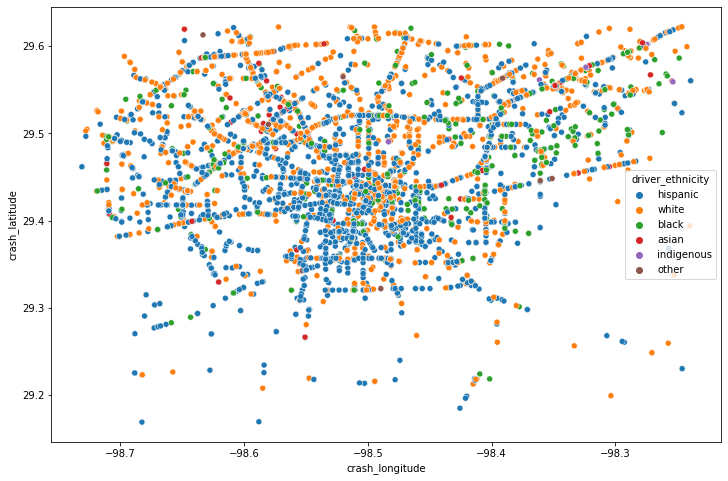

In [13]:
plt.figure(figsize=(12,8))
sns.scatterplot(data=train, x="crash_longitude", y="crash_latitude", hue='driver_ethnicity')

<AxesSubplot:xlabel='crash_longitude', ylabel='crash_latitude'>

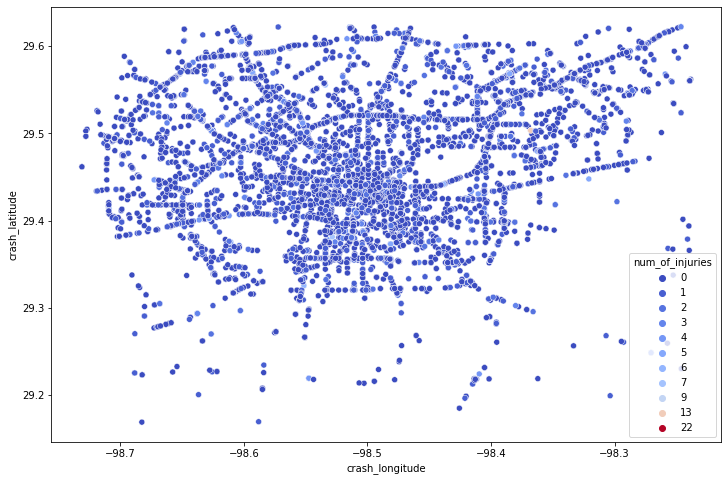

In [14]:
plt.figure(figsize=(12,8))
sns.scatterplot(data=train, x="crash_longitude", y="crash_latitude", hue='num_of_injuries', palette = 'coolwarm', legend = 'full')

In [22]:
df.num_of_injuries.max()

22

In [27]:
df.loc[df.num_of_injuries==22]

,Unnamed: 0,index,crash_url,case_id,crash_id,crash_city,crash_date,crash_latitude,crash_longitude,police_dept,...,cdl,unlicensed,dl_class_a,dl_class_b,dl_class_m,vehicle_dmg_zone,concentrated_damage,distributed_damage,rollover_damage,vehicle_burned
3567,3567,3567,https://app.myaccident.org/accident/0000281833...,SAPD21122634,18332740,"SAN ANTONIO, TX",06/27/21 10:24 AM,29.39991,-98.472491,SAN ANTONIO POLICE DEPARTMENT,...,0,1,0,0,0,-1,0,0,0,0
3568,3568,3568,https://app.myaccident.org/accident/0000281833...,SAPD21122634,18332740,"SAN ANTONIO, TX",06/27/21 10:24 AM,29.39991,-98.472491,SAN ANTONIO POLICE DEPARTMENT,...,0,0,0,0,0,2,0,0,0,0
3569,3569,3569,https://app.myaccident.org/accident/0000281833...,SAPD21122634,18332740,"SAN ANTONIO, TX",06/27/21 10:24 AM,29.39991,-98.472491,SAN ANTONIO POLICE DEPARTMENT,...,0,0,0,0,0,2,0,0,0,0
3570,3570,3570,https://app.myaccident.org/accident/0000281833...,SAPD21122634,18332740,"SAN ANTONIO, TX",06/27/21 10:24 AM,29.39991,-98.472491,SAN ANTONIO POLICE DEPARTMENT,...,0,1,0,0,0,6,0,0,0,0
3571,3571,3571,https://app.myaccident.org/accident/0000281833...,SAPD21122634,18332740,"SAN ANTONIO, TX",06/27/21 10:24 AM,29.39991,-98.472491,SAN ANTONIO POLICE DEPARTMENT,...,0,0,0,0,0,6,0,0,0,0
3572,3572,3572,https://app.myaccident.org/accident/0000281833...,SAPD21122634,18332740,"SAN ANTONIO, TX",06/27/21 10:24 AM,29.39991,-98.472491,SAN ANTONIO POLICE DEPARTMENT,...,0,0,0,0,0,7,0,1,0,0
3573,3573,3573,https://app.myaccident.org/accident/0000281833...,SAPD21122634,18332740,"SAN ANTONIO, TX",06/27/21 10:24 AM,29.39991,-98.472491,SAN ANTONIO POLICE DEPARTMENT,...,0,0,0,0,0,4,0,1,0,0
3574,3574,3574,https://app.myaccident.org/accident/0000281833...,SAPD21122634,18332740,"SAN ANTONIO, TX",06/27/21 10:24 AM,29.39991,-98.472491,SAN ANTONIO POLICE DEPARTMENT,...,0,0,0,0,0,2,0,0,0,0


In [28]:
df.num_of_injuries.value_counts()

0     11069
1      2771
2       810
3       291
4        91
5        37
6        24
9         9
22        8
7         7
13        3
Name: num_of_injuries, dtype: int64

In [20]:
df.dtypes

crash_url                object
case_id                  object
crash_id                  int64
crash_city               object
crash_date               object
crash_latitude          float64
crash_longitude         float64
police_dept              object
accident_factor          object
speed_limit              object
crash_location           object
num_of_injuries           int64
num_of_vehicles           int64
num_of_occupants          int64
at_fault                  int64
car_contained_injury      int64
vehicle_make             object
vehicle_year              int64
vehicle_color            object
vin                      object
driver_age                int64
driver_ethnicity         object
driver_residence        float64
dl_state                 object
driver_insured           object
traffic_conditions       object
weather_conditions       object
driver_male               int64
cdl                       int64
unlicensed                int64
dl_class_a                int64
dl_class

<AxesSubplot:xlabel='crash_longitude', ylabel='crash_latitude'>

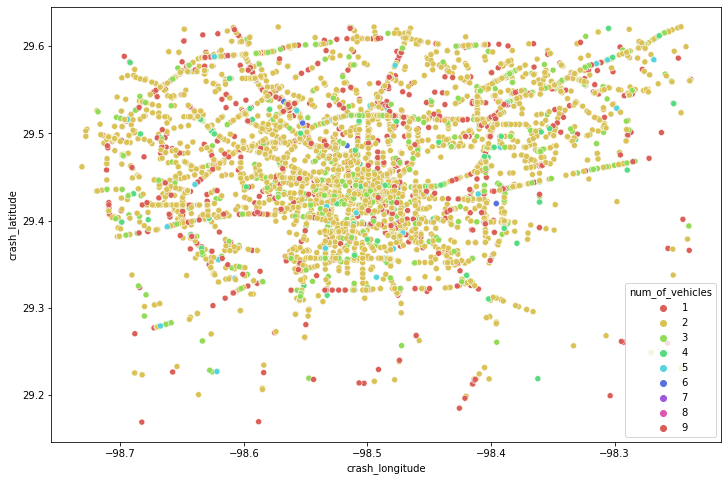

In [15]:
plt.figure(figsize=(12,8))
sns.scatterplot(data=train, x="crash_longitude", y="crash_latitude", hue='num_of_vehicles', palette = 'hls', legend = 'full')

In [ ]:
plt.figure(figsize=(12,8))
sns.scatterplot(data=train, x="crash_longitude", y="crash_latitude", hue='num_of_vehicles', palette = 'hls', legend = 'full')

<AxesSubplot:xlabel='crash_longitude', ylabel='crash_latitude'>

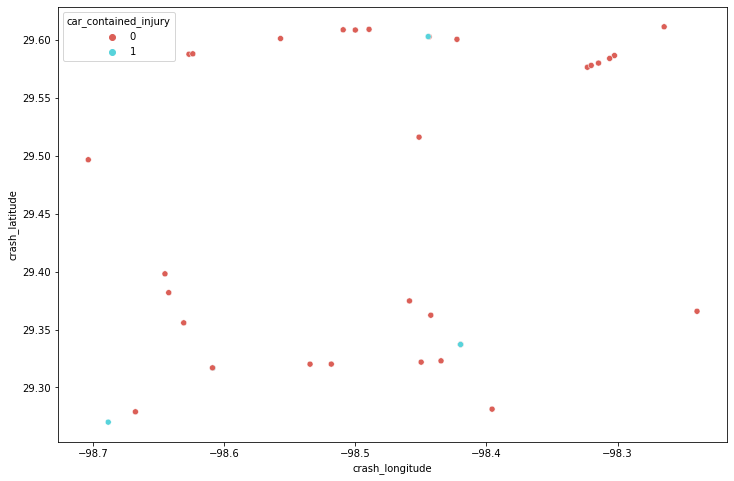

In [63]:
plt.figure(figsize=(12,8))
sns.scatterplot(data=train[(train.speed_limit == '70 MPH') & (train.speed == 1)], x="crash_longitude", y="crash_latitude", hue='car_contained_injury', palette = 'hls', legend = 'full')

<AxesSubplot:xlabel='crash_longitude', ylabel='crash_latitude'>

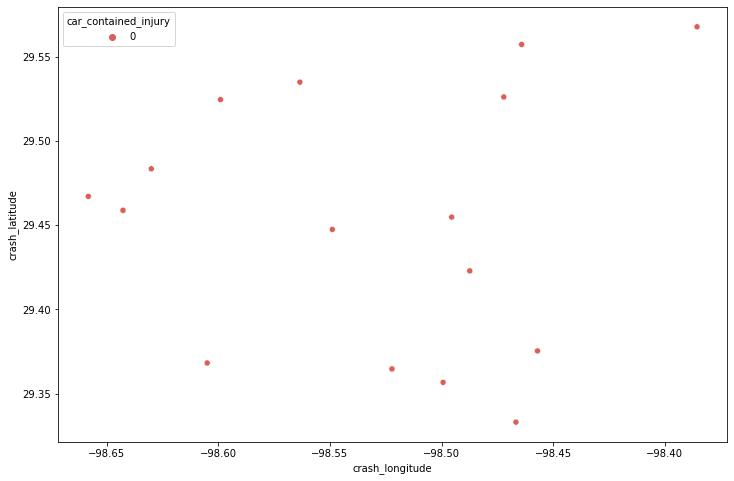

In [51]:
plt.figure(figsize=(12,8))
sns.scatterplot(data=train[(train.speed_limit == '5 MPH') & (train.speed == 0)], x="crash_longitude", y="crash_latitude", hue='car_contained_injury', palette = 'hls', legend = 'full')

<AxesSubplot:xlabel='crash_longitude', ylabel='crash_latitude'>

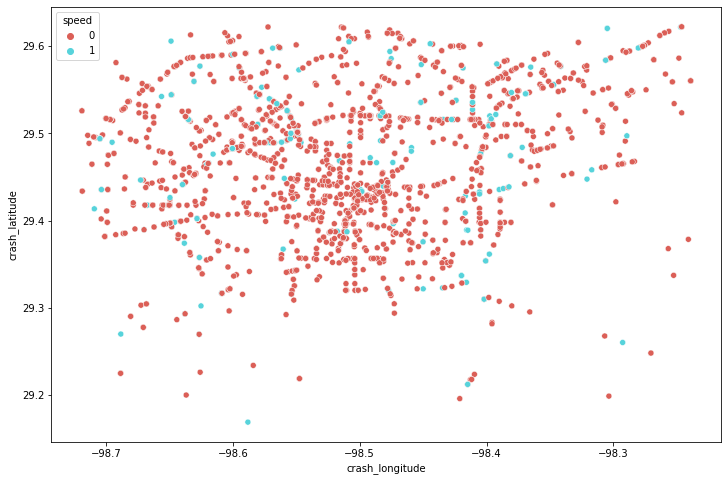

In [70]:
plt.figure(figsize=(12,8))
sns.scatterplot(data=train[(train.num_of_injuries > 0)], x="crash_longitude", y="crash_latitude", hue='speed', palette = 'hls', legend = 'full')

<AxesSubplot:xlabel='crash_longitude', ylabel='crash_latitude'>

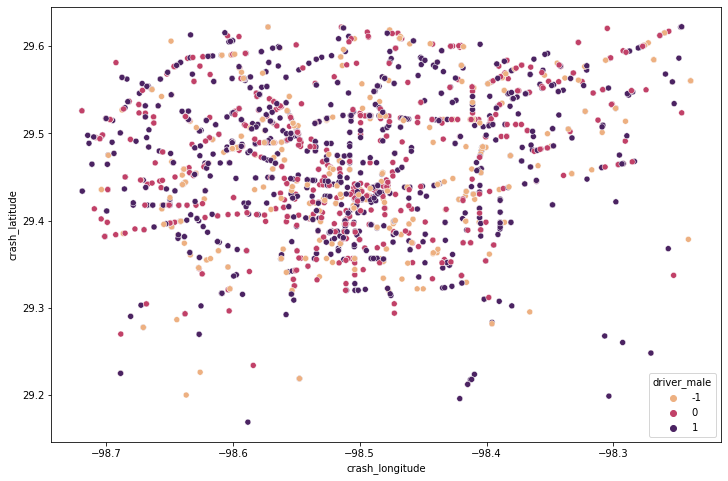

In [23]:
plt.figure(figsize=(12,8))
sns.scatterplot(data=train[(train.num_of_injuries > 0)], x="crash_longitude", y="crash_latitude", hue='driver_male', palette = 'flare', legend = 'full')

In [46]:
train.speed_limit.value_counts()

45 MPH    1773
35 MPH    1326
30 MPH    1297
65 MPH    1167
40 MPH    1144
60 MPH     555
70 MPH     255
20 MPH     251
-1 MPH     232
50 MPH     149
55 MPH     142
25 MPH     117
5 MPH       19
15 MPH      18
10 MPH      15
75 MPH       7
Name: speed_limit, dtype: int64

Text(0.5, 1.0, 'Features Correlated Casualties in SA Crashes')

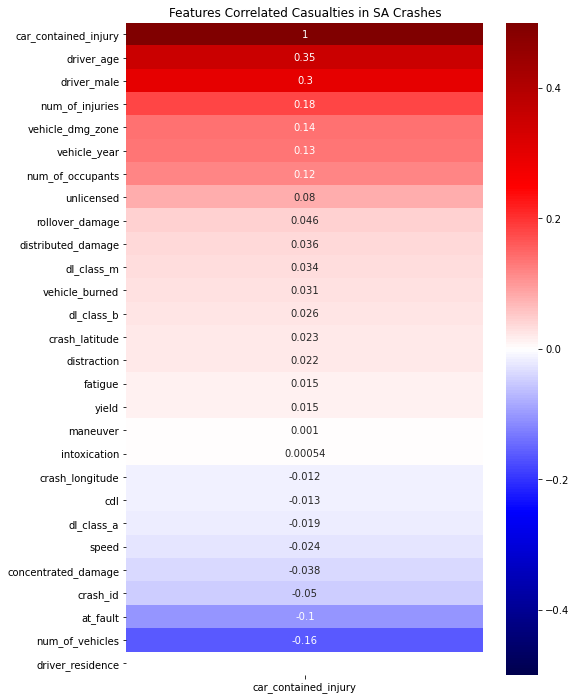

In [18]:
plt.figure(figsize=(8,12))
heatmap = sns.heatmap(train[train.num_of_injuries>0].corr()[['car_contained_injury']].sort_values(by='car_contained_injury', ascending=False), vmin=-.5, vmax=.5, annot=True,cmap='seismic')
heatmap.set_title('Features Correlated Casualties in SA Crashes')

In [16]:
df.columns

Index(['crash_url', 'case_id', 'crash_id', 'crash_city', 'crash_date',
       'crash_latitude', 'crash_longitude', 'police_dept', 'accident_factor',
       'speed_limit', 'crash_location', 'num_of_injuries', 'num_of_vehicles',
       'num_of_occupants', 'at_fault', 'car_contained_injury', 'vehicle_make',
       'vehicle_year', 'vehicle_color', 'vin', 'driver_age',
       'driver_ethnicity', 'driver_residence', 'dl_state', 'driver_insured',
       'traffic_conditions', 'weather_conditions', 'driver_male', 'cdl',
       'unlicensed', 'dl_class_a', 'dl_class_b', 'dl_class_m',
       'vehicle_dmg_zone', 'concentrated_damage', 'distributed_damage',
       'rollover_damage', 'vehicle_burned', 'distraction', 'maneuver', 'speed',
       'intoxication', 'fatigue', 'yield'],
      dtype='object')

In [31]:
#was using this to create data dictionary
df.sort_index(axis=1).columns

Index(['Unnamed: 0', 'accident_factor', 'at_fault', 'car_contained_injury',
       'case_id', 'cdl', 'concentrated_damage', 'crash_city', 'crash_date',
       'crash_id', 'crash_latitude', 'crash_location', 'crash_longitude',
       'crash_url', 'distraction', 'distributed_damage', 'dl_class_a',
       'dl_class_b', 'dl_class_m', 'dl_state', 'driver_age',
       'driver_ethnicity', 'driver_gender', 'driver_insured',
       'driver_residence', 'fatigue', 'index', 'intoxication', 'maneuver',
       'num_of_injuries', 'num_of_occupants', 'num_of_vehicles', 'police_dept',
       'rollover_damage', 'speed', 'speed_limit', 'traffic_conditions',
       'unlicensed', 'vehicle_burned', 'vehicle_color', 'vehicle_dmg_zone',
       'vehicle_make', 'vehicle_year', 'vin', 'weather_conditions', 'yield'],
      dtype='object')

In [61]:
#was using this to create data dictionary
df.vehicle_dmg_zone.value_counts()

 1     6344
 2     2773
-1     1939
 4      940
 7      861
 3      695
 6      610
 5      452
 8      356
 9      112
 0       30
 10       8
Name: vehicle_dmg_zone, dtype: int64

In [25]:
df.columns

Index(['crash_url', 'case_id', 'crash_id', 'crash_city', 'crash_date',
       'crash_latitude', 'crash_longitude', 'police_dept', 'accident_factor',
       'speed_limit', 'crash_location', 'num_of_injuries', 'num_of_vehicles',
       'num_of_occupants', 'at_fault', 'car_contained_injury', 'vehicle_make',
       'vehicle_year', 'vehicle_color', 'vin', 'driver_age',
       'driver_ethnicity', 'driver_residence', 'dl_state', 'driver_insured',
       'traffic_conditions', 'weather_conditions', 'driver_male', 'cdl',
       'unlicensed', 'dl_class_a', 'dl_class_b', 'dl_class_m',
       'vehicle_dmg_zone', 'concentrated_damage', 'distributed_damage',
       'rollover_damage', 'vehicle_burned', 'distraction', 'maneuver', 'speed',
       'intoxication', 'fatigue', 'yield'],
      dtype='object')

In [24]:
df.speed_limit.value_counts()

45 MPH    3149
35 MPH    2392
30 MPH    2329
65 MPH    2057
40 MPH    2032
60 MPH     964
70 MPH     498
20 MPH     455
-1 MPH     408
50 MPH     271
55 MPH     259
25 MPH     197
15 MPH      38
5 MPH       33
10 MPH      25
75 MPH      13
Name: speed_limit, dtype: int64

In [28]:
df['speed_limit'] = df['speed_limit'].str.extract('(\d+)').astype(int)

In [29]:
df.speed_limit.value_counts()

45    3149
35    2392
30    2329
65    2057
40    2032
60     964
70     498
20     455
1      408
50     271
55     259
25     197
15      38
5       33
10      25
75      13
Name: speed_limit, dtype: int64

In [41]:
df.dtypes

crash_url                object
case_id                  object
crash_id                  int64
crash_city               object
crash_date               object
crash_latitude          float64
crash_longitude         float64
police_dept              object
accident_factor          object
speed_limit               int64
crash_location           object
num_of_injuries           int64
num_of_vehicles           int64
num_of_occupants          int64
at_fault                  int64
car_contained_injury      int64
vehicle_make             object
vehicle_year              int64
vehicle_color            object
vin                      object
driver_age                int64
driver_ethnicity         object
driver_residence        float64
dl_state                 object
driver_insured           object
traffic_conditions       object
weather_conditions       object
driver_male               int64
cdl                       int64
unlicensed                int64
dl_class_a                int64
dl_class

<AxesSubplot:xlabel='crash_longitude', ylabel='crash_latitude'>

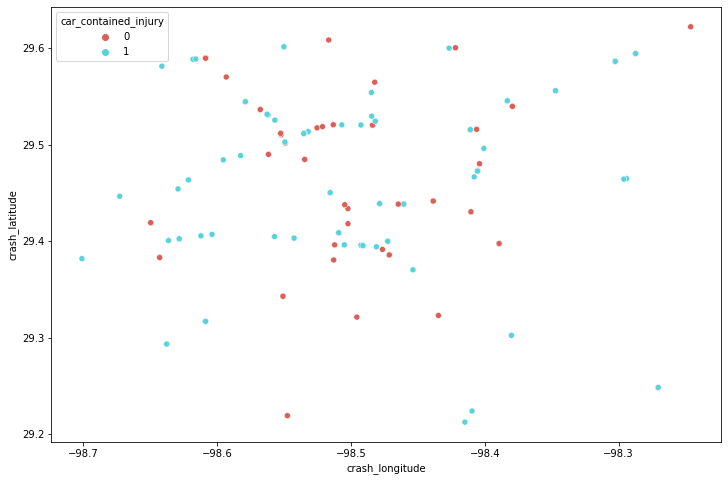

In [64]:
plt.figure(figsize=(12,8))
sns.scatterplot(data=train[(train.speed_limit >= 60) & (train.num_of_injuries > 1)], x="crash_longitude", y="crash_latitude", hue='car_contained_injury', palette = 'hls', legend = 'full')

<AxesSubplot:xlabel='crash_longitude', ylabel='crash_latitude'>

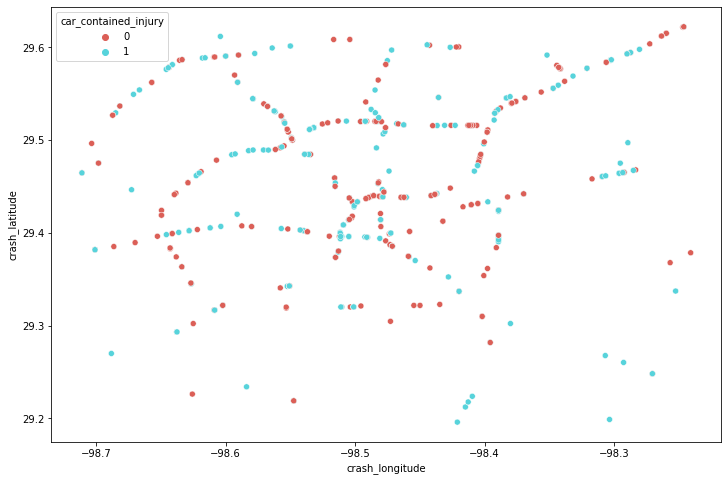

In [66]:
plt.figure(figsize=(12,8))
sns.scatterplot(data=train[(train.speed_limit >= 60) & (train.num_of_injuries > 0)], x="crash_longitude", y="crash_latitude", hue='car_contained_injury', palette = 'hls', legend = 'full')

<AxesSubplot:xlabel='crash_longitude', ylabel='crash_latitude'>

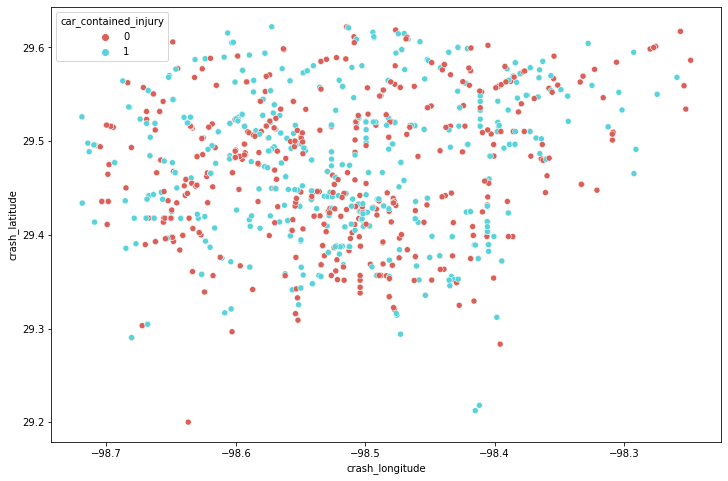

In [71]:
plt.figure(figsize=(12,8))
sns.scatterplot(data=train[(train.speed_limit >= 35) & (train.speed_limit <= 45) & (train.num_of_injuries > 0)], x="crash_longitude", y="crash_latitude", hue='car_contained_injury', palette = 'hls', legend = 'full')

In [46]:
train.speed_limit

12176    45 MPH
14197    45 MPH
5520     45 MPH
14975    45 MPH
78       45 MPH
          ...  
271      45 MPH
3827     45 MPH
2485     30 MPH
4666     60 MPH
8483     70 MPH
Name: speed_limit, Length: 8467, dtype: object

In [73]:
df.dtypes

crash_url                object
case_id                  object
crash_id                  int64
crash_city               object
crash_date               object
crash_latitude          float64
crash_longitude         float64
police_dept              object
accident_factor          object
speed_limit               int64
crash_location           object
num_of_injuries           int64
num_of_vehicles           int64
num_of_occupants          int64
at_fault                  int64
car_contained_injury      int64
vehicle_make             object
vehicle_year              int64
vehicle_color            object
vin                      object
driver_age                int64
driver_ethnicity         object
driver_residence        float64
dl_state                 object
driver_insured           object
traffic_conditions       object
weather_conditions       object
driver_male               int64
cdl                       int64
unlicensed                int64
dl_class_a                int64
dl_class

In [76]:
df.crash_date

0        07/12/21 07:00 PM
1        07/12/21 07:00 PM
2        07/12/21 06:55 PM
3        07/12/21 06:55 PM
4        07/12/21 06:45 PM
               ...        
15115    02/12/21 06:15 PM
15116    02/12/21 06:15 PM
15117    02/12/21 06:15 PM
15118    02/12/21 06:04 PM
15119    02/12/21 06:04 PM
Name: crash_date, Length: 15120, dtype: object

### Part Two

In [3]:
df = p.prep_collision_data()

In [46]:
df.dtypes

Unnamed: 0                int64
index                     int64
crash_url                object
crash_id                  int64
crash_date               object
crash_latitude          float64
crash_longitude         float64
fault_narrative          object
speed_limit_mph           int64
injury_count_total        int64
num_of_vehicles           int64
num_of_occupants          int64
fault_reported            int64
car_contained_injury      int64
vehicle_make             object
vehicle_year              int64
vehicle_color            object
vehicle_id               object
driver_age                int64
driver_male               int64
driver_race              object
dl_state                 object
conditions_road          object
conditions_weather       object
dl_cdl                    int64
dl_unlicensed             int64
dl_class_a                int64
dl_class_b                int64
dl_class_m                int64
vehicle_dmg_zone          int64
concentrated_damage       int64
distribu

In [7]:
df.crash_date = pd.to_datetime(df.crash_date)

In [8]:
df.dtypes

Unnamed: 0                       int64
index                            int64
crash_url                       object
crash_id                         int64
crash_date              datetime64[ns]
crash_latitude                 float64
crash_longitude                float64
fault_narrative                 object
speed_limit_mph                  int64
injury_count_total               int64
num_of_vehicles                  int64
num_of_occupants                 int64
fault_reported                   int64
car_contained_injury             int64
vehicle_make                    object
vehicle_year                     int64
vehicle_color                   object
vehicle_id                      object
driver_age                       int64
driver_male                      int64
driver_race                     object
dl_state                        object
conditions_road                 object
conditions_weather              object
dl_cdl                           int64
dl_unlicensed            

In [4]:
df.head()

,Unnamed: 0,index,crash_url,crash_id,crash_date,crash_latitude,crash_longitude,fault_narrative,speed_limit_mph,injury_count_total,...,concentrated_damage,distributed_damage,rollover_damage,vehicle_burned,fault_distraction,fault_maneuver,fault_speed,fault_intoxication,fault_fatigue,fault_yield
0,0,0,https://app.myaccident.org/accident/0000281836...,18365140,07/12/2021 19:00,29.416846,-98.409521,new flyer turned unsafe,30,0,...,0,0,0,0,0,1,0,0,0,0
1,1,1,https://app.myaccident.org/accident/0000281836...,18365140,07/12/2021 19:00,29.416846,-98.409521,new flyer turned unsafe,30,0,...,0,0,0,0,0,1,0,0,0,0
2,2,2,https://app.myaccident.org/accident/0000281836...,18362861,07/12/2021 18:55,29.608839,-98.492803,,45,0,...,0,0,0,0,0,0,0,0,0,0
3,3,3,https://app.myaccident.org/accident/0000281836...,18362861,07/12/2021 18:55,29.608839,-98.492803,,45,0,...,0,1,0,0,0,0,0,0,0,0
4,4,4,https://app.myaccident.org/accident/0000281837...,18378488,07/12/2021 18:45,29.597752,-98.562687,jeep inattention jeep distraction vehicle,45,0,...,0,1,0,0,1,0,0,0,0,0


In [9]:
df['crash_time'] = df['crash_date'].dt.time

In [22]:
df['crash_hour'] = df.crash_date.apply(lambda x: x.hour)

In [24]:
df.crash_hour.astype(int)

0        19
1        19
2        18
3        18
4        18
         ..
15115    18
15116    18
15117    18
15118    18
15119    18
Name: crash_hour, Length: 15120, dtype: int64

In [31]:
df.crash_hour.value_counts()

17    1210
18    1131
19    1035
16    1019
14     969
15     952
13     882
12     751
20     726
22     680
10     667
11     624
21     553
9      545
23     528
8      525
0      397
3      363
7      320
1      301
2      294
6      232
4      218
5      198
Name: crash_hour, dtype: int64

In [41]:
len(df[(df.crash_hour==17) & (df.car_contained_injury==1)]) / len(df)

0.010317460317460317

In [46]:
#proportion 
len(df[(df.crash_hour==17) & (df.car_contained_injury==1)]) / len(df[(df.crash_hour==17)])

0.12892561983471074

In [42]:
len(df[(df.crash_hour==5) & (df.car_contained_injury==1)]) / len(df)

0.0015873015873015873

In [48]:
df.groupby('crash_hour').car_contained_injury.mean()

crash_hour
0     0.115869
1     0.119601
2     0.108844
3     0.093664
4     0.087156
5     0.121212
6     0.077586
7     0.125000
8     0.123810
9     0.110092
10    0.130435
11    0.150641
12    0.163782
13    0.147392
14    0.137255
15    0.126050
16    0.152110
17    0.128926
18    0.117595
19    0.123671
20    0.140496
21    0.108499
22    0.127941
23    0.113636
Name: car_contained_injury, dtype: float64

Lol, I really need to do it on train. Let me do one more feature first.

Unnamed: 0                       int64
index                            int64
crash_url                       object
crash_id                         int64
crash_date              datetime64[ns]
crash_latitude                 float64
crash_longitude                float64
fault_narrative                 object
speed_limit_mph                  int64
injury_count_total               int64
num_of_vehicles                  int64
num_of_occupants                 int64
fault_reported                   int64
car_contained_injury             int64
vehicle_make                    object
vehicle_year                     int64
vehicle_color                   object
vehicle_id                      object
driver_age                       int64
driver_male                      int64
driver_race                     object
dl_state                        object
conditions_road                 object
conditions_weather              object
dl_cdl                           int64
dl_unlicensed            

In [56]:
df['crash_day_of_week'] = df.crash_date.apply(lambda x: x.day_name())

In [57]:
df

,Unnamed: 0,index,crash_url,crash_id,crash_date,crash_latitude,crash_longitude,fault_narrative,speed_limit_mph,injury_count_total,...,vehicle_burned,fault_distraction,fault_maneuver,fault_speed,fault_intoxication,fault_fatigue,fault_yield,crash_time,crash_hour,crash_day_of_week
0,0,0,https://app.myaccident.org/accident/0000281836...,18365140,2021-07-12 19:00:00,29.416846,-98.409521,new flyer turned unsafe,30,0,...,0,0,1,0,0,0,0,19:00:00,19,Monday
1,1,1,https://app.myaccident.org/accident/0000281836...,18365140,2021-07-12 19:00:00,29.416846,-98.409521,new flyer turned unsafe,30,0,...,0,0,1,0,0,0,0,19:00:00,19,Monday
2,2,2,https://app.myaccident.org/accident/0000281836...,18362861,2021-07-12 18:55:00,29.608839,-98.492803,,45,0,...,0,0,0,0,0,0,0,18:55:00,18,Monday
3,3,3,https://app.myaccident.org/accident/0000281836...,18362861,2021-07-12 18:55:00,29.608839,-98.492803,,45,0,...,0,0,0,0,0,0,0,18:55:00,18,Monday
4,4,4,https://app.myaccident.org/accident/0000281837...,18378488,2021-07-12 18:45:00,29.597752,-98.562687,jeep inattention jeep distraction vehicle,45,0,...,0,1,0,0,0,0,0,18:45:00,18,Monday
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15115,15115,3828,https://app.myaccident.org/accident/0000281810...,18108730,2021-02-12 18:15:00,29.381912,-98.700943,nissan disregard stop sign light,65,3,...,0,0,0,0,0,0,0,18:15:00,18,Friday
15116,15116,3829,https://app.myaccident.org/accident/0000281810...,18108730,2021-02-12 18:15:00,29.381912,-98.700943,nissan disregard stop sign light,65,3,...,0,0,0,0,0,0,0,18:15:00,18,Friday
15117,15117,3830,https://app.myaccident.org/accident/0000281810...,18108730,2021-02-12 18:15:00,29.381912,-98.700943,nissan disregard stop sign light,65,3,...,0,0,0,0,0,0,0,18:15:00,18,Friday
15118,15118,3831,https://app.myaccident.org/accident/0000281810...,18106090,2021-02-12 18:04:00,29.445502,-98.540641,mitsubishi inattention,30,0,...,0,1,0,0,0,0,0,18:04:00,18,Friday


In [58]:
df.groupby('crash_day_of_week').car_contained_injury.mean()

crash_day_of_week
Friday       0.121032
Monday       0.131132
Saturday     0.136384
Sunday       0.121571
Thursday     0.123769
Tuesday      0.125173
Wednesday    0.140359
Name: car_contained_injury, dtype: float64

In [62]:
df.loc[df.injury_count_total >0, "accident_contained_injury"] = 1

In [66]:
df.accident_contained_injury.fillna(0, inplace=True)

In [68]:
df.groupby('crash_hour').accident_contained_injury.mean()

crash_hour
0     0.256927
1     0.249169
2     0.234694
3     0.228650
4     0.220183
5     0.237374
6     0.185345
7     0.271875
8     0.255238
9     0.238532
10    0.247376
11    0.282051
12    0.335553
13    0.307256
14    0.298246
15    0.258403
16    0.289500
17    0.279339
18    0.248453
19    0.266667
20    0.272727
21    0.222423
22    0.267647
23    0.267045
Name: accident_contained_injury, dtype: float64

In [67]:
df.groupby('crash_day_of_week').accident_contained_injury.mean()

crash_day_of_week
Friday       0.263095
Monday       0.263208
Saturday     0.262800
Sunday       0.255514
Thursday     0.259728
Tuesday      0.270670
Wednesday    0.300095
Name: accident_contained_injury, dtype: float64

In [69]:
def split(df):
    '''splitting our data, and stratifying car_contained_injury.'''
    train_validate, test = train_test_split(df, test_size=.2, 
                                        random_state=123, 
                                        stratify=df.car_contained_injury)
    train, validate = train_test_split(train_validate, test_size=.3, 
                                   random_state=123, 
                                   stratify=train_validate.car_contained_injury)
    return train, validate, test

In [70]:
train, validate, test = split(df)

In [71]:
def split_X_y(train, validate, test, target):
    '''
    Splits train, validate, and test into a dataframe with independent variables
    and a series with the dependent, or target variable. 
    The function returns 3 dataframes and 3 series:
    X_train (df) & y_train (series), X_validate & y_validate, X_test & y_test. 
    '''

        
    # split train into X (dataframe, drop target) & y (series, keep target only)
    X_train = train.drop(columns=[target])
    y_train = train[target]
    
    # split validate into X (dataframe, drop target) & y (series, keep target only)
    X_validate = validate.drop(columns=[target])
    y_validate = validate[target]
    
    # split test into X (dataframe, drop target) & y (series, keep target only)
    X_test = test.drop(columns=[target])
    y_test = test[target]
    
    return X_train, y_train, X_validate, y_validate, X_test, y_test

In [72]:
X_train, y_train, X_validate, y_validate, X_test, y_test = split_X_y(train, validate, test, 'car_contained_injury')

In [73]:
train.groupby('crash_hour').car_contained_injury.mean()

crash_hour
0     0.105000
1     0.114458
2     0.110465
3     0.101382
4     0.070796
5     0.128440
6     0.056000
7     0.112903
8     0.103226
9     0.103659
10    0.143236
11    0.156977
12    0.175644
13    0.137500
14    0.133595
15    0.128253
16    0.157618
17    0.122449
18    0.124006
19    0.135325
20    0.133995
21    0.103774
22    0.134021
23    0.122517
Name: car_contained_injury, dtype: float64

In [74]:
train.groupby('crash_day_of_week').car_contained_injury.mean()

crash_day_of_week
Friday       0.113409
Monday       0.132224
Saturday     0.126501
Sunday       0.133903
Thursday     0.122673
Tuesday      0.126206
Wednesday    0.148117
Name: car_contained_injury, dtype: float64

In [75]:
train.groupby('crash_hour').accident_contained_injury.mean()

crash_hour
0     0.245000
1     0.265060
2     0.220930
3     0.230415
4     0.203540
5     0.247706
6     0.168000
7     0.258065
8     0.235484
9     0.240854
10    0.246684
11    0.293605
12    0.348946
13    0.318750
14    0.286837
15    0.239777
16    0.306480
17    0.258017
18    0.249603
19    0.291740
20    0.258065
21    0.226415
22    0.273196
23    0.271523
Name: accident_contained_injury, dtype: float64

In [76]:
train.groupby('crash_day_of_week').accident_contained_injury.mean()

crash_day_of_week
Friday       0.256063
Monday       0.270578
Saturday     0.248199
Sunday       0.254511
Thursday     0.267343
Tuesday      0.267685
Wednesday    0.307113
Name: accident_contained_injury, dtype: float64